# Importing important Libraries

In [64]:
import psycopg2
import pandas as pd
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# To connect Postgresql Database with Jupyter notebook

In [4]:
connection = psycopg2.connect(
    user = 'postgres',
    password = 'root',
    host = '127.0.0.1',
    port = '5434',
    database = 'motorcycle_part_sales'
)
cursor = connection.cursor()
print('connected to postgreSQL')

connected to postgreSQL


In [5]:
cursor.execute("select table_name from information_schema.tables where table_schema = 'public';")
print(cursor.fetchall())

[('sales',)]


In [ ]:
# display all the sales data

In [7]:
query ="""
select * from sales;
"""
cursor.execute(query)
data = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]
# convert to Dataframe
df = pd.DataFrame(data, columns=columns)
# Display the DataFrame
df.head()

,order_number,date,warehouse,client_type,product_line,quantity,unit_price,total,payment,payment_fee
0,N1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash,0.00
1,N2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card,0.03
2,N3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer,0.01
3,N4,2021-06-01,North,Wholesale,Suspension & traction,40,37.37,1494.80,Transfer,0.01
4,N5,2021-06-01,North,Retail,Frame & body,6,45.44,272.61,Credit card,0.03


# How many total records are there?

In [8]:
query = """ select count(*) as total_records from sales; """
cursor.execute(query)
data = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]
df = pd.DataFrame(data, columns = columns)
df.head()

,total_records
0,1000


# What are the distinct warehouses, product lines, and client types?

In [60]:
query = """ select distinct warehouse from sales;
"""
cursor.execute(query)
data = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]
df = pd.DataFrame(data, columns = columns)
df.head()

,warehouse
0,West
1,North
2,Central


In [61]:
query = """ 
select distinct product_line from sales;
"""
cursor.execute(query)
data = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]
df = pd.DataFrame(data, columns = columns)
df.head()

,product_line
0,Electrical system
1,Suspension & traction
2,Breaking system
3,Engine
4,Miscellaneous


In [62]:
query = """ 
select distinct client_type from sales;
"""
cursor.execute(query)
data = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]
df = pd.DataFrame(data, columns = columns)
df.head()

,client_type
0,Wholesale
1,Retail


# What is the total revenue?

In [21]:
query = """ select sum(total) as total_revenue from sales;
"""
cursor.execute(query)
data = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]
df = pd.DataFrame(data, columns = columns)
df.head()

,total_revenue
0,289113.00


# Which product line has the highest sales?

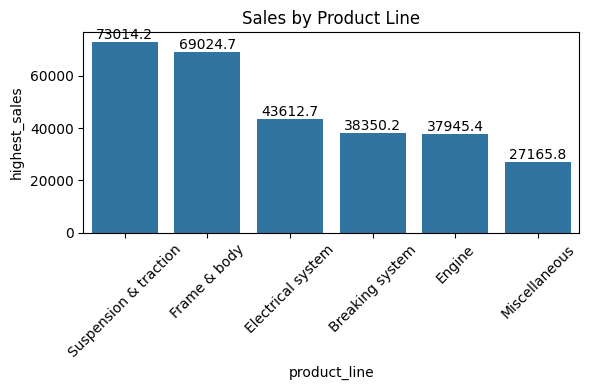

In [81]:
query = """ select product_line, sum(total) as highest_sales from sales
group by product_line
order by highest_sales desc;
"""
cursor.execute(query)
data = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]
df = pd.DataFrame(data, columns = columns)
# df.head()
plt.figure(figsize=(6,4))
ax = sns.barplot(x = 'product_line', y= 'highest_sales', data=df)
plt.title('Sales by Product Line')
plt.xticks(rotation=45)
plt.tight_layout()
ax.bar_label(ax.containers[0])
plt.show()

# How many orders came from each warehouse?

In [23]:
query = """ select warehouse, count(order_number) as total_order from sales
group by warehouse ;
"""
cursor.execute(query)
data = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]
df = pd.DataFrame(data, columns = columns)
df.head()

,warehouse,total_order
0,West,180
1,North,340
2,Central,480


# Monthly sales trends

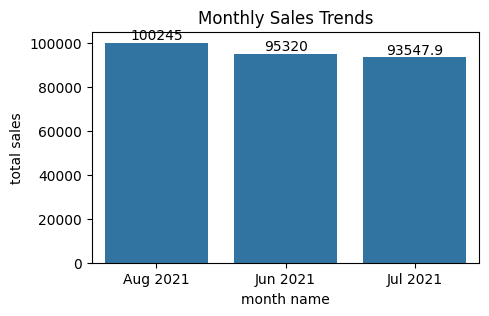

In [98]:
query = """ select date_trunc('month', date) as months , sum(total) as total_monthly_sales from sales
group by months
order by total_monthly_sales desc;
"""
cursor.execute(query)
data = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]
df = pd.DataFrame(data, columns = columns)
df['month_name'] = df['months'].dt.strftime('%b %Y')
df = df.drop('months', axis=1)
# df.head()
plt.figure(figsize=(5,3))
ax = sns.barplot(x= 'month_name' , y = 'total_monthly_sales',data=df)
plt.xlabel('month name')
plt.ylabel('total sales')
plt.title('Monthly Sales Trends')
ax.bar_label(ax.containers[0])
plt.show()

# Total sales by client_type (Retail vs Wholesale)

In [38]:
query = """ select client_type , sum(total) as total_sales from sales
group by client_type;
"""
cursor.execute(query)
data = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]
df = pd.DataFrame(data, columns = columns)
df.head()

,client_type,total_sales
0,Wholesale,159642.33
1,Retail,129470.67


# Preferred payment methods

In [53]:
query = """ select payment as payment_method , sum(total) as total_revenue from sales
group by payment_method;
"""
cursor.execute(query)
data = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]
df = pd.DataFrame(data, columns = columns)
df.head()

,payment_method,total_revenue
0,Cash,19199.10
1,Transfer,159642.33
2,Credit card,110271.57


# Average payment fee by payment type

In [57]:
query = """ select payment as payment_method , round(avg(payment_fee),2) as avg_payment_fee from sales
group by payment_method;
"""
cursor.execute(query)
data = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]
df = pd.DataFrame(data, columns = columns)
df.head()

,payment_method,avg_payment_fee
0,Cash,0.00
1,Transfer,0.01
2,Credit card,0.03


In [ ]:
cursor.close()
connection.close()
print("Connection closed")